# Assignment 8
## Due June 20th at 12:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

a) The likelihood for the set of samples ${X_1,...,X_n}$ is given by:

$$\Pi_{i=1}^N p(X_i|\theta); \quad p(X_i|\theta) = \begin{cases}
\frac{1}{\theta} & \text{if  }  0<x_i<\theta\\
0 & otherwise
\end{cases}$$

This product obviously goes to 0 if $\theta$ is chosen smaller than $max_{i\in[n]} X_i$. If it is chosen greater than $max_{i\in[n]} X_i$, the fraction $\frac{1}{\theta}$ becomes smaller. The ML solution is, therefore $\theta = max_{i\in[n]} X_i$.

### b)

(array([2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.320e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 1.143e+03, 0.000e+00, 3.257e+03]),
 array([0.80300393, 0.80612758, 0.80925122, 0.81237486, 0.81549851,
        0.81862215, 0.8217458 , 0.82486944, 0.82799309, 0.83111673,
        0.83424038, 0.83736402, 0.84048767, 0.84361131, 0.84673495,
        0.8498586 , 0.85298224, 0.85610589, 0.85922953

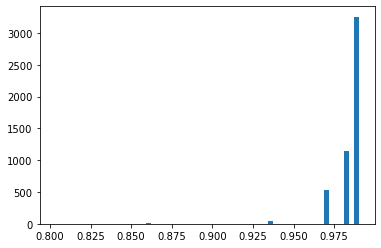

In [4]:
B=5000
n=25

# data points
X=np.random.rand(n)

# array holding the bootstrap estimates of theta
theta_nonparam_boot = np.zeros(B)

for i in range(B):
    bootstrap_samp = np.random.choice(X, size=len(X), replace=True)
    theta_nonparam_boot[i] = bootstrap_samp.max()

plt.hist(theta_nonparam_boot, bins=60)

**(c)** In the present case, where we estimate the maximum of a sample, the bootstrap samples $X^*_1,...,X^*_i,...,X^*_n$ provide a lower bound of the maximum of the original samples $X_1,...,X_i,...,X_n$, i.e., $\hat{\theta}_n \geq \hat{\theta}^*_{n,i} \quad \forall i$. If we assume that all values in $X_1,...,X_i,...,X_n$ are unique, i.e., there is only one maximal value, the probability for each bootstrap sample $P(X^*_i < max_{i\in[n]} X_i) = 1-\frac{1}{n}$. For all n bootstrap samples combined, the probability that the maximal value of the original sample is *not* in the bootstrap sample can be calculated by multiplying the single samples' probabilities:

$P(max_{i\in[n]} X^*_i < max_{i\in[n]} X_i) = \Pi_{i=1}^n P(X^*_i < max_{i\in[n]} X_i) = (1-\frac{1}{n})^n$

$\implies P(T_n^* \leq 0) \equiv  P(\hat{\theta}_n \leq \hat{\theta}^*_n) = 1-P(max_{i\in[n]} X^*_i < max_{i\in[n]} X_i) = 1-(1-\frac{1}{n})^n$


**(d)** with the hint, the problem can be rewritten as:

$ \lim_{n \to \infty} \sup_{t \in \mathbb{R}} |P(T_n \leq t) - P(T_n^* \leq t)| \geq P(T_n^* \leq 0)$ . Since, in the present case, $T_n^*$ cannot be smaller than 0, as argued above, $P(T_n^* \leq 0) = P(T_n^* = 0)$, i.e., the probability that the bootstrap parameter is an unbiased estimator of the original sample parameter.

...




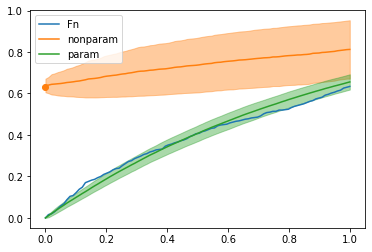

In [16]:
#(e)
n_realizations = 500
B=200
n=25
theta=1
Tn = np.zeros(n_realizations)
Tn_nb, Tn_pb = [np.zeros((n_realizations,B)) for _ in range(2)]

# compute T_n, T_n^* and T_n^~ for param. as well as nonparam. bootstrap


for r in range(n_realizations):
    X=theta * np.random.rand(n)
    theta_hat_n = X.max()
    Tn[r] = n*(theta-theta_hat_n)
    for boot_idx in range(B):
        bootstrap_samp_nonparametric = np.random.choice(X,size=n,replace=True)
        theta_star_n = bootstrap_samp_nonparametric.max()
        Tn_nb[r,boot_idx] = n*(theta_hat_n-theta_star_n)
        bootstrap_samp_parametric = np.random.rand(n)*theta_hat_n
        theta_tilde_n = bootstrap_samp_parametric.max()
        Tn_pb[r,boot_idx] = n*(theta_hat_n - theta_tilde_n)

# for each realization compute the empirical cumulative distribution function (ecdf) of T_n across realizations and, for each realization, the ecdf of T_n^* and T_n^~ across bootstrap samples
zs = np.linspace(0,1,100)
Fn = np.zeros_like(zs)
Fn_nb, Fn_pb = [np.zeros((zs.shape[0],n_realizations)) for _ in range(2)]

for i,z in enumerate(zs):
    Fn[i] = np.mean(Tn <= z)
    for r in range(n_realizations):
        Fn_nb[i,r] = np.mean(Tn_nb[r,:] <= z)
        Fn_pb[i,r] = np.mean(Tn_pb[r,:] <= z)

# plot the empirical distribution functions with uncertainty bands across realizations
plt.plot(zs, Fn, label = 'Fn')
plt.plot(zs, [Fn_nb[iz,:].mean() for iz in range(zs.shape[0])], label = 'nonparam')
plt.fill_between(zs, [Fn_nb[iz,:].mean()-Fn_nb[iz,:].std() for iz in range(zs.shape[0])],[Fn_nb[iz,:].mean()+Fn_nb[iz,:].std() for iz in range(zs.shape[0])], alpha = 0.4, color = 'tab:orange')
plt.plot(zs, [Fn_pb[iz,:].mean() for iz in range(zs.shape[0])], label = 'param')
plt.fill_between(zs, [Fn_pb[iz,:].mean()-Fn_pb[iz,:].std() for iz in range(zs.shape[0])],[Fn_pb[iz,:].mean()+Fn_pb[iz,:].std() for iz in range(zs.shape[0])], alpha = 0.4, color = 'tab:green')
plt.scatter(0,1-np.exp(-1),color='tab:orange')
plt.legend()

## Exercise 2



## Exercise 3


In [18]:
with open('rfdata_train.npy', 'rb') as f:
    X_train = np.load(f)
    y_train = np.load(f)

with open('rfdata_test.npy', 'rb') as f:
    X_test = np.load(f)
    y_test = np.load(f)

### a)

Text(0.5, 1.0, 'test scores')

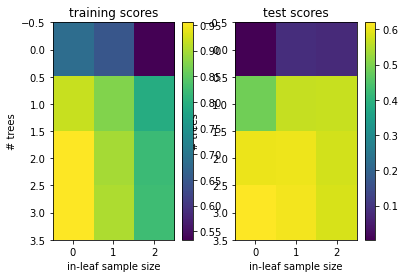

In [23]:
from sklearn.ensemble import RandomForestRegressor

n_trees = [1,10,100,1000]
n_inleaf = [1,5,10]

train_scores, test_scores = [np.zeros((len(n_trees),len(n_inleaf))) for _ in range(2)]

# save scores to index [i_tree, i_inleaf] and make a heatmap
for i_tree, n_tree in enumerate(n_trees):
    for i_inleaf, n_inl in enumerate(n_inleaf):
        clf = RandomForestRegressor(n_estimators=n_tree,min_samples_leaf=n_inl).fit(X_train,y_train)
        train_scores[i_tree,i_inleaf] = clf.score(X_train,y_train)
        test_scores[i_tree,i_inleaf] = clf.score(X_test,y_test)


fig,ax = plt.subplots(1,2)
im1=ax[0].imshow(train_scores,aspect='auto')
plt.colorbar(im1,ax=ax[0])
ax[0].set_xlabel('in-leaf sample size')
ax[0].set_ylabel('# trees')
ax[0].set_title('training scores')
im2=ax[1].imshow(test_scores,aspect='auto')
plt.colorbar(im2,ax=ax[1])
ax[1].set_xlabel('in-leaf sample size')
ax[1].set_ylabel('# trees')
ax[1].set_title('test scores')


### Conclusions:

For training scores, the in-leaf sample size seems to be more important than the number of trees, while for test scores, both seem to be important. For a single tree, the train scores decrease with in-leafe sample size, while the opposite is true for the test scores.

### b)

1 features out of 50
2 samples out of 750
1 features out of 50
102 samples out of 750
1 features out of 50
202 samples out of 750
1 features out of 50
302 samples out of 750
1 features out of 50
402 samples out of 750
1 features out of 50
502 samples out of 750
1 features out of 50
602 samples out of 750
1 features out of 50
702 samples out of 750
11 features out of 50
2 samples out of 750
11 features out of 50
102 samples out of 750
11 features out of 50
202 samples out of 750
11 features out of 50
302 samples out of 750
11 features out of 50
402 samples out of 750
11 features out of 50
502 samples out of 750
11 features out of 50
602 samples out of 750
11 features out of 50
702 samples out of 750
21 features out of 50
2 samples out of 750
21 features out of 50
102 samples out of 750
21 features out of 50
202 samples out of 750
21 features out of 50
302 samples out of 750
21 features out of 50
402 samples out of 750
21 features out of 50
502 samples out of 750
21 features out of 50
60

Text(0.5, 1.0, 'test scores')

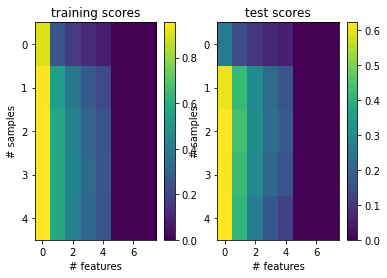

In [35]:
n_train, n_feat = X_train.shape

# make heatmaps of train and test score for various choices of number of features per split and number of samples per bootstrap sample

train_iter = np.arange(2,n_train,100)
feat_iter = np.arange(1,n_feat,10)
train_scores, test_scores = [np.zeros((len(feat_iter),len(train_iter))) for _ in range(2)]

# save scores to index [i_tree, i_inleaf] and make a heatmap
for i_ft,n_ft in enumerate(feat_iter):
    for i_samp,n_samp in enumerate(train_iter):
        print(f'{n_ft} features out of {n_feat}\n{n_samp} samples out of {n_train}')
        clf = RandomForestRegressor(n_estimators=1000,min_samples_leaf=1, min_samples_split= n_samp, max_features = n_ft).fit(X_train,y_train)
        train_scores[i_ft,i_samp] = clf.score(X_train,y_train)
        test_scores[i_ft,i_samp] = clf.score(X_test,y_test)


fig,ax = plt.subplots(1,2)
im1=ax[0].imshow(train_scores,aspect='auto')
plt.colorbar(im1,ax=ax[0])
ax[0].set_xlabel('# features')
ax[0].set_ylabel('# samples')
ax[0].set_title('training scores')
im2=ax[1].imshow(test_scores,aspect='auto')
plt.colorbar(im2,ax=ax[1])
ax[1].set_xlabel('# features')
ax[1].set_ylabel('# samples')
ax[1].set_title('test scores')

### Conclusions:

The score seems to mainly depend on the number of features, but it seems do decrease with more features (counter-intuitive).

In [41]:
inform_features = np.array([ 2,  9, 14, 19, 20, 25, 27, 29, 42, 45, 46, 47])

# find 12 features that are important for the random forest
feat_imp = RandomForestRegressor().fit(X_train,y_train).feature_importances_
rf_features = np.argsort(feat_imp)[-12:]

len(np.intersect1d(inform_features, rf_features)) == 12

True

### What did you do?

Sort features by importance, keep the 12 most important ones

### What could you do instead?

especially if number of important features is not known a priori: look for an 'elbow' in the feature importance plot. Or (computationally expensive): Combine all possible numbers and combinations of features and search for best training or test accuracy.